In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'cats_vs_dogs/train', 
    labels ='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'cats_vs_dogs/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
 


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Conv2D(64, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))




model.add(Conv2D(128, kernel_size=(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


c:\coding\coding_test\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 504s 802ms/step - accuracy: 0.5939 - loss: 0.6901 - val_accuracy: 0.7274 - val_loss: 0.5470
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 546s 873ms/step - accuracy: 0.7407 - loss: 0.5166 - val_accuracy: 0.7644 - val_loss: 0.5097
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 489s 781ms/step - accuracy: 0.8080 - loss: 0.4168 - val_accuracy: 0.7960 - val_loss: 0.4894
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 533s 853ms/step - accuracy: 0.8711 - loss: 0.3003 - val_accuracy: 0.7530 - val_loss: 0.6976
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 537s 858ms/step - accuracy: 0.9213 - loss: 0.1855 - val_accuracy: 0.7800 - val_loss: 0.6974


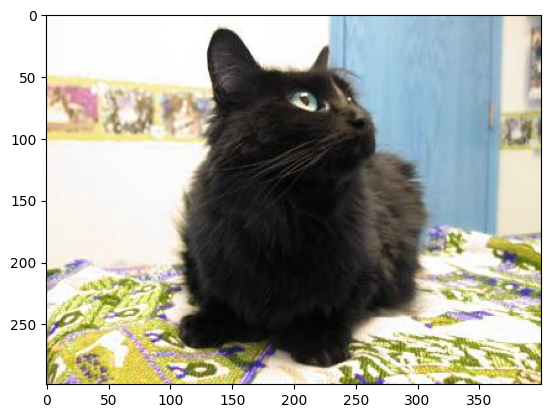

In [64]:
test_img = cv2.imread('cat.147.jpg')
plt.imshow(test_img)


In [65]:
test_img.shape
test_img= cv2.resize(test_img,(256,256))
test_imput=test_img.reshape((1,256,256,3))
model.predict(test_imput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.]], dtype=float32)

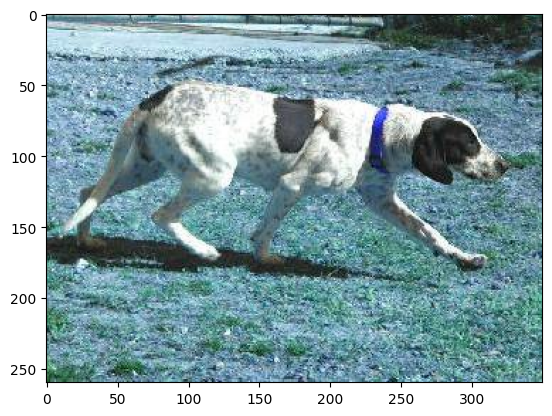

In [66]:
test_img = cv2.imread('dog.452.jpg')
plt.imshow(test_img)


In [67]:
test_img.shape
test_img= cv2.resize(test_img,(256,256))
test_imput=test_img.reshape((1,256,256,3))
model.predict(test_imput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.]], dtype=float32)